In [2]:
import pandas as pd
import numpy as np
from meteostat import Stations, Daily
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# lat/long for SFO
sfo_lat = 37.61961
sfo_lon = -122.36558

In [4]:
stations = Stations()
stations = stations.nearby(sfo_lat, sfo_lon)

In [5]:
nearest_station = stations.fetch(5).reset_index()
nearest_station

,id,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
0,72494,San Francisco Airport,US,CA,72494,KSFO,37.6167,-122.3667,3.0,America/Los_Angeles,1973-01-01,2023-05-11,1945-07-01,2023-05-03,1945-01-01,2022-01-01,338.279955
1,KSQL0,San Carlos / Silver Penny Mobile Home Park,US,CA,<NA>,KSQL,37.5119,-122.2495,2.0,America/Los_Angeles,2006-01-01,2023-05-11,2019-03-04,2022-04-24,2020-01-01,2022-01-01,15751.857328
2,72493,Metro Oakland International Airport,US,CA,72493,KOAK,37.7167,-122.2333,2.0,America/Los_Angeles,1943-01-01,2023-05-11,1943-01-02,2023-05-03,1943-01-01,2022-01-01,15878.005861
3,KHAF0,Half Moon Bay / El Granada Mobile Home Park,US,CA,<NA>,KHAF,37.5134,-122.5012,20.0,America/Los_Angeles,2009-07-17,2023-05-11,2009-07-18,2022-04-24,2011-01-01,2022-01-01,16803.506587
4,74506,Alameda Naval Air Station,US,CA,74506,KNGZ,37.7833,-122.3167,4.0,America/Los_Angeles,1973-01-01,1997-01-01,1945-03-01,1996-12-31,1945-01-01,1996-01-01,18702.613349


In [6]:
nearest_id = nearest_station['id'][0]

In [7]:
start = datetime(2017, 6, 28)
end = datetime(2019, 12, 31)

# Get daily data
sfo_data = Daily(nearest_id, start, end)
sfo_data = sfo_data.fetch()
# sfo_data.to_csv("")

In [8]:
sfo_data.apply(lambda x: sum(x.isna()))

tavg      0
tmin      0
tmax      0
prcp      0
snow    190
wdir    158
wspd      0
wpgt    917
pres     15
tsun    917
dtype: int64

In [9]:
sfo_data.shape

(917, 10)

In [42]:
# Get daily data
oak_data = Daily("72493", start, end)
oak_data = oak_data.fetch()

In [1]:
sfo_data.shape

NameError: name 'sfo_data' is not defined

In [49]:
sfo_snow = sfo_data[~sfo_data.snow.isna()]


<Axes: xlabel='prcp', ylabel='Count'>

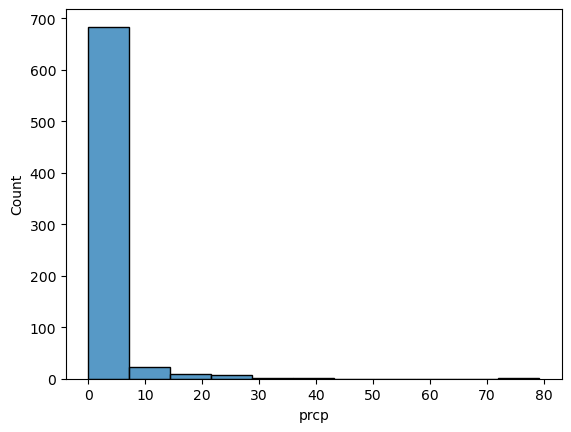

In [51]:
sns.lineplot()